In [ ]:
!pip install nltk==3.5

     |████████████████████████████████| 1.4MB 2.8MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434678 sha256=e45d61e08b60a7aaac77c8dd31c2192ec714ac77445c6742cd3529a2ee95baec
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
!pip install scikit-learn==0.23.2

     |████████████████████████████████| 6.8MB 2.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The nltk version is {}.'.format(sklearn.__version__))

The nltk version is 3.5.
The nltk version is 0.23.2.


In [ ]:
import pickle
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Toolkit
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score,confusion_matrix, classification_report,f1_score

from sklearn.feature_extraction.text import TfidfVectorizer

#Traditional ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df = pd.read_csv('processed_jobs_dataset.csv')
df.shape

(1146, 6)

In [ ]:
df.head()

,Unnamed: 0,RequiredQual,Eligibility,Title,JobDescription,JobRequirment
0,4,University degree; economical background is a ...,NaN,Software Developer,NaN,- Rendering technical assistance to Database M...
1,19,"As a GD you are creative, innovative and have ...",NaN,Graphic Designer,The position of Graphic Designer (GD) demands ...,Graphic Designer will be responsible for every...
2,35,Work experience of at least two years; Knowle...,NaN,Programmer,NaN,NaN
3,76,Professional background in graphic design; Str...,NaN,Graphic Designer,Ameria CJSC is seeking qualified candidates fo...,- Design of company production packaging;\r\n-...
4,92,"Degree in Computer Science, Information Techno...",NaN,Software Developer,"Synergy International Systems, Inc./Armenia se...",Specific tasks and key responsibilities includ...


In [ ]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        # lemmatize text - convert to base form 
        self.wnl = WordNetLemmatizer()
        # creating stopwords list, to ignore lemmatizing stopwords 
        self.stopwords = stopwords.words('english')
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if t not in self.stopwords]

# removing new line characters, and certain hypen patterns                  
df['RequiredQual']=df['RequiredQual'].apply(lambda x: x.replace('\n', ' ').replace('\r', '').replace('- ', ''). replace(' - ', ' to '))

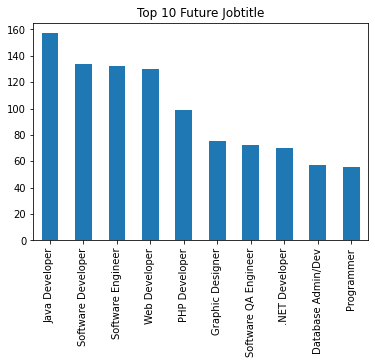

In [ ]:
df.Title.value_counts().head(10).plot.bar(title="Top 10 Future Jobtitle")

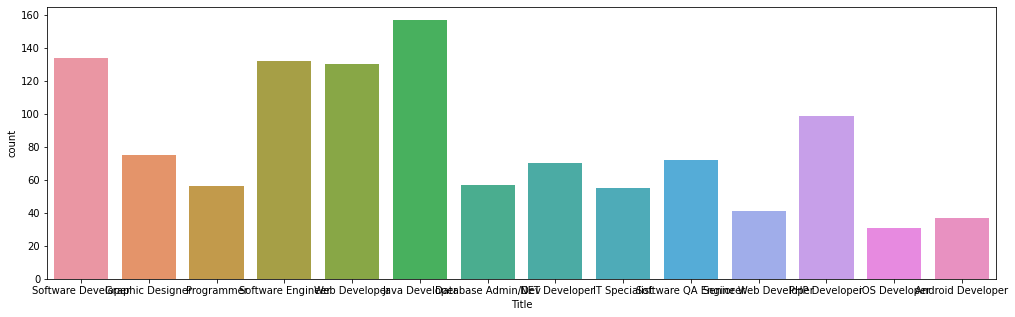

In [ ]:
plt.figure(figsize=(17,5))
sns.countplot(df['Title'])

Vectorize + Convert to array

In [ ]:
# train features and labels 
y = df['Title']
X = df['RequiredQual']

In [ ]:
print("X Shape : " + str(X.shape))
print("y Shape : " + str(y.shape))

X Shape : (1146,)
y Shape : (1146,)


In [ ]:
print("Sample input")
print(X.iloc[0])
print("**************")
print("Sample output")
print(y.iloc[0])

Sample input
University degree; economical background is a plus; Excellent knowledge of Windows 2000 Server, Networking TCP/ IP technologies, MS SQL 2000 Server, Visual Basic 6; At least 2 years of experience in database software development; Good knowledge of English. REMUNERATION:  Will be commensurate with the norms accepted in the Company.
**************
Sample output
Software Developer


In [ ]:
# tdif feature rep 
vectorizer = TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english')
vectorizer.fit(X)
# transforming text to tdif features
tfidf_matrix = vectorizer.transform(X)
X_tdif = tfidf_matrix.toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
X_tdif[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print("tfidf_matrix Shape : " + str(tfidf_matrix.shape))
print("X_tdif Shape : " + str(X_tdif.shape))

tfidf_matrix Shape : (1146, 2903)
X_tdif Shape : (1146, 2903)


Encoding text labels in categories

In [ ]:
enc = LabelEncoder() 
enc.fit(y.values)
y_enc=enc.transform(y.values)

In [ ]:
print("y_enc Shape : " + str(y_enc.shape))

y_enc Shape : (1146,)


In [ ]:
y_enc.max()

13

In [ ]:
X_train_words, X_test_words, y_train, y_test = train_test_split(X, y_enc, test_size=0.15, random_state=1)

In [ ]:
print("X_train_words Shape : " + str(X_train_words.shape))
print("X_test_words Shape : " + str(X_test_words.shape))
print("y_train Shape : " + str(y_train.shape))
print("y_test Shape : " + str(y_test.shape))

X_train_words Shape : (974,)
X_test_words Shape : (172,)
y_train Shape : (974,)
y_test Shape : (172,)


In [ ]:
X_train = vectorizer.transform(X_train_words)
X_train = X_train.toarray()

X_test = vectorizer.transform(X_test_words)
X_test = X_test.toarray()
X_test.shape

(172, 2903)

In [ ]:
X_train[0]

array([0.        , 0.        , 0.13096519, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
y_train[0]

3

Model 1 : Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
train_preds = gnb.predict(X_train)
test_preds = gnb.predict(X_test)

print('Train acc: {0}'.format(accuracy_score(y_train, train_preds)))
print('Test acc: {0}'.format(accuracy_score(y_test, test_preds)))

Train acc: 0.9394250513347022
Test acc: 0.7267441860465116


In [ ]:
print("Detailed classification report:")
y_true, gnb_pred = y_test, gnb.predict(X_test)
print(classification_report(y_true, gnb_pred))

Detailed classification report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.60      0.75      0.67         4
           2       0.82      0.75      0.78        12
           3       0.73      0.73      0.73        11
           4       0.70      0.70      0.70        10
           5       0.77      0.95      0.85        21
           6       0.89      0.73      0.80        11
           7       1.00      0.67      0.80         9
           8       0.00      0.00      0.00         4
           9       0.59      0.45      0.51        22
          10       0.58      0.65      0.61        17
          11       0.91      0.83      0.87        12
          12       0.68      0.89      0.77        19
          13       1.00      0.71      0.83         7

    accuracy                           0.73       172
   macro avg       0.71      0.69      0.69       172
weighted avg       0.73      0.73      0.72     

In [ ]:
confusion = confusion_matrix(y_test, gnb_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[11  0  0  0  0  0  0  0  0  1  1  0  0  0]
 [ 0  3  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  1  0  0  2  0]
 [ 0  0  0  8  1  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  1  7  0  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  1  0  0  0]
 [ 2  0  0  0  0  0  8  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1  6  0  2  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  1  1  0  0  0]
 [ 0  0  2  1  1  2  0  0  2 10  3  0  1  0]
 [ 0  0  0  0  1  1  0  0  0  1 11  1  2  0]
 [ 1  0  0  0  0  0  0  0  0  0  1 10  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0 17  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  5]]


In [ ]:
gnb_file = open('gnb_new1.pckl', 'wb')
pickle.dump(gnb, gnb_file)
gnb_file.close()

In [ ]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

Model 2 : Logistic Regression

In [ ]:
logistic = LogisticRegression(max_iter=1000,verbose=1, C=1)
logistic.fit(X_train, y_train)
train_preds = logistic.predict(X_train)
test_preds = logistic.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


In [ ]:
print('Train acc: {0}'.format(accuracy_score(y_train, train_preds)))
print('Test acc: {0}'.format(accuracy_score(y_test, test_preds)))

Train acc: 0.8850102669404517
Test acc: 0.7790697674418605


In [ ]:
logistic.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 1,
 'warm_start': False}

In [ ]:

print("Detailed classification report:")
y_true, logistic_pred = y_test, logistic.predict(X_test)
print(classification_report(y_true, logistic_pred))

Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       1.00      1.00      1.00         4
           2       1.00      0.58      0.74        12
           3       0.92      1.00      0.96        11
           4       0.78      0.70      0.74        10
           5       0.70      1.00      0.82        21
           6       0.71      0.91      0.80        11
           7       1.00      0.78      0.88         9
           8       0.00      0.00      0.00         4
           9       0.57      0.55      0.56        22
          10       0.55      0.71      0.62        17
          11       1.00      1.00      1.00        12
          12       0.84      0.84      0.84        19
          13       1.00      0.57      0.73         7

    accuracy                           0.78       172
   macro avg       0.79      0.75      0.76       172
weighted avg       0.79      0.78      0.77     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion = confusion_matrix(y_test, logistic_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[11  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  3  2  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  7  0  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  1  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  1  3  2  0  0 12  2  0  2  0]
 [ 0  0  0  0  1  2  1  0  0  1 12  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  2  0 16  0]
 [ 0  0  0  0  0  1  0  0  0  0  2  0  0  4]]


In [ ]:
logistic_file = open('logistic_new1.pckl', 'wb')
pickle.dump(logistic, logistic_file)
logistic_file.close()

Model 3 : Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=135, max_depth=12,random_state=2)
clf.fit(X_train, y_train)
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

In [ ]:
print('Train acc: {0}'.format(accuracy_score(y_train, train_preds)))
print('Test acc: {0}'.format(accuracy_score(y_test, test_preds)))

Train acc: 0.9579055441478439
Test acc: 0.8023255813953488


In [ ]:
print("Detailed classification report:")
y_true, clf_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, clf_pred))

Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       1.00      1.00      1.00         4
           2       0.88      0.58      0.70        12
           3       0.92      1.00      0.96        11
           4       0.83      1.00      0.91        10
           5       0.70      1.00      0.82        21
           6       0.92      1.00      0.96        11
           7       1.00      0.67      0.80         9
           8       0.00      0.00      0.00         4
           9       0.60      0.55      0.57        22
          10       0.72      0.76      0.74        17
          11       1.00      1.00      1.00        12
          12       0.71      0.89      0.79        19
          13       1.00      0.57      0.73         7

    accuracy                           0.80       172
   macro avg       0.81      0.77      0.77       172
weighted avg       0.80      0.80      0.79     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion = confusion_matrix(y_test, clf_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[10  0  0  0  0  0  0  0  0  2  0  0  1  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  3  2  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  6  0  1  0  0  1  0]
 [ 0  0  0  0  0  2  0  0  0  1  1  0  0  0]
 [ 0  0  1  0  2  4  0  0  0 12  0  0  3  0]
 [ 0  0  0  0  0  2  1  0  0  1 13  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  1  0 17  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  2  4]]


In [ ]:
randomforest_file = open('randomforest_new1.pckl', 'wb')
pickle.dump(clf, randomforest_file)
randomforest_file.close()

In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 135,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

Creating Job Recommendations

Recommends 2 job position alternatives given a job requirement. By obtaining probability of class predictions, and picking the top N predictions, other than true label, N closest recommendations can be got

In [ ]:
preds_data = {'Current Position': [], 'Current Position Requirments': [], 'Alternative 1': [], 'Alternative 2': []}
y_preds_proba = logistic.predict_proba(X_test)

counter = 0 
for idx, (pred_row, true_job_position) in enumerate(zip(y_preds_proba, y_test)):
    class_preds = np.argsort(pred_row)
    # delete true class
    for i in [-1, -2]:
        if class_preds[i] == true_job_position:
            class_preds=np.delete(class_preds,i)
    # getting other 2 highest job predictions         
    top_classes = class_preds[-2:]
    # obtaining class name string from int label 
    class_names = enc.inverse_transform(top_classes)
    true_job_position_name = enc.inverse_transform([true_job_position])
    # saving to dict
    preds_data['Current Position'].append(true_job_position_name[0])
    preds_data['Current Position Requirments'].append(X_test_words.iloc[idx])
    preds_data['Alternative 1'].append(class_names[1])
    preds_data['Alternative 2'].append(class_names[0])
    
    counter +=1

In [ ]:
preds_df = pd.DataFrame.from_dict(preds_data)

In [ ]:
preds_df.head(10)

,Current Position,Current Position Requirments,Alternative 1,Alternative 2
0,IT Specialist,Degree in Computer Science or in similar disci...,Graphic Designer,Web Developer
1,Software Developer,Higher education in a relevant field; Good kno...,.NET Developer,Web Developer
2,Software Developer,At least 3 years of work experience in softwar...,Web Developer,Java Developer
3,.NET Developer,At least 4 years of experience in developing a...,Software Developer,Software Engineer
4,Programmer,Bachelor's degree in Computer Science or a rel...,PHP Developer,Web Developer
5,Database Admin/Dev,Strong experience with SQL Server and Transact...,Software Engineer,Software Developer
6,IT Specialist,Higher Technical education (preferably in IT s...,Database Admin/Dev,Software Developer
7,Java Developer,At least 5 years of work experience as a Softw...,Software Engineer,Web Developer
8,Database Admin/Dev,Bachelors degree in Computer Sciences or a rel...,Software Engineer,Software Developer
9,Software QA Engineer,"Excellent knowledge of English language, both ...",Software Engineer,Java Developer


Inference on user provided data

In [ ]:
#inference_test=X_test_words.iloc[0]
inference_test = 'From 1 to 5 years of experience in Android development; Fast learner; Good team player with the ability to accept criticism; Experience in streaming and SIP technologies is a plus.'
inference_test

'From 1 to 5 years of experience in Android development; Fast learner; Good team player with the ability to accept criticism; Experience in streaming and SIP technologies is a plus.'

In [ ]:
inference_test_vectorized = vectorizer.transform([inference_test])
inference_test_vectorized = inference_test_vectorized.toarray()

In [ ]:
inference_test_vectorized

array([[0., 0., 0., ..., 0., 0., 0.]])

Getting results

In [ ]:
inference_preds_data = {'Current Position': [], 'Current Position Requirments': [], 'Alternative 1': [], 'Alternative 2': []}
inference_y_preds_proba = clf.predict_proba(inference_test_vectorized)

counter = 0 
for idx, (pred_row, true_job_position) in enumerate(zip(inference_y_preds_proba, y_test)):
    class_preds = np.argsort(pred_row)
    # delete true class
    for i in [-1, -2]:
        if class_preds[i] == true_job_position:
            class_preds=np.delete(class_preds,i)
    # getting other 2 highest job predictions         
    top_classes = class_preds[-2:]
    # obtaining class name string from int label 
    class_names = enc.inverse_transform(top_classes)
    true_job_position_name = enc.inverse_transform([true_job_position])
    # saving to dict
    inference_preds_data['Current Position'].append(true_job_position_name[0])
    inference_preds_data['Current Position Requirments'].append(X_test_words.iloc[idx])
    inference_preds_data['Alternative 1'].append(class_names[1])
    inference_preds_data['Alternative 2'].append(class_names[0])
    
    counter +=1

In [ ]:
inference_preds_df = pd.DataFrame.from_dict(inference_preds_data)
inference_preds_df.head()

,Current Position,Current Position Requirments,Alternative 1,Alternative 2
0,IT Specialist,Degree in Computer Science or in similar disci...,Android Developer,Software Engineer


In [ ]:
def loadData(): 
    # for reading also binary mode is important 
    dbfile = open('/content/gnb_new1.pckl', 'rb')      
    db = pickle.load(dbfile) 
    print(db.predict_proba(inference_test_vectorized))
    dbfile.close() 

In [ ]:
loadData()

[[0.00000000e+000 6.29005590e-203 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 2.45945582e-093]]
